#Law of Large Numbers - Notebook

References/Tutor
* Wiki
* Anthropic's AI Claude

The Law of Large Numbers (LLN) is a fundamental principle in probability theory and statistics. It states that as the sample size increases, the sample mean converges to the expected value (population mean). There are two main forms:

1. Weak Law of Large Numbers: The sample average converges in probability to the expected value.
2. Strong Law of Large Numbers: The sample average converges almost surely to the expected value.

The LLN is crucial in understanding why larger sample sizes generally lead to more accurate estimates of population parameters.

Glossary of Terms:

| Term | Description |
|------|-------------|
| Population | The entire group of individuals or instances about which information is sought |
| Sample | A subset of the population used to estimate population characteristics |
| Expected Value | The long-run average value of a random variable over a large number of trials |
| Sample Mean | The average of a sample, calculated as the sum of all values divided by the sample size |
| Convergence in Probability | A type of convergence where the probability that the difference between the sample statistic and the population parameter is greater than any fixed number approaches zero as the sample size increases |
| Almost Sure Convergence | A stronger form of convergence where the probability that the limiting relationship holds is equal to one |
| Standard Error | The standard deviation of the sampling distribution of a statistic |

Now, let's create a Python script that demonstrates the Law of Large Numbers with three examples:

```python
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Function to demonstrate LLN
def demonstrate_lln(distribution, params, true_mean, num_samples, max_n, num_experiments):
    """
    Demonstrates the Law of Large Numbers for a given distribution.
    
    Args:
    distribution (function): NumPy random distribution function
    params (tuple): Parameters for the distribution
    true_mean (float): True mean of the distribution
    num_samples (int): Number of sample sizes to test
    max_n (int): Maximum sample size
    num_experiments (int): Number of experiments to run for each sample size
    
    Returns:
    sample_sizes (array): Array of sample sizes tested
    mean_estimates (array): Array of mean estimates for each sample size
    """
    # Generate logarithmically spaced sample sizes
    sample_sizes = np.logspace(0, np.log10(max_n), num_samples, dtype=int)
    
    # Initialize array to store mean estimates
    mean_estimates = np.zeros((num_experiments, len(sample_sizes)))
    
    # Run experiments
    for i in range(num_experiments):
        for j, n in enumerate(sample_sizes):
            # Generate samples and calculate mean
            samples = distribution(*params, size=n)
            mean_estimates[i, j] = np.mean(samples)
    
    return sample_sizes, mean_estimates

# Set up the distributions to test
distributions = [
    (np.random.normal, (0, 1), 0, "Normal(0, 1)"),
    (np.random.exponential, (1,), 1, "Exponential(1)"),
    (np.random.binomial, (10, 0.5), 5, "Binomial(10, 0.5)")
]

# Set up the plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Law of Large Numbers Demonstration")

# Run demonstration for each distribution
for i, (dist, params, true_mean, name) in enumerate(distributions):
    sample_sizes, mean_estimates = demonstrate_lln(dist, params, true_mean,
                                                   num_samples=50, max_n=10000,
                                                   num_experiments=100)
    
    # Plot results
    axs[i].semilogx(sample_sizes, mean_estimates.T, 'b-', alpha=0.1)
    axs[i].semilogx(sample_sizes, np.mean(mean_estimates, axis=0), 'r-', linewidth=2)
    axs[i].axhline(y=true_mean, color='g', linestyle='--')
    axs[i].set_xlabel('Sample Size')
    axs[i].set_ylabel('Sample Mean')
    axs[i].set_title(name)
    axs[i].grid(True)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary Statistics:")
print(f"{'Distribution':^15} {'True Mean':^10} {'Final Est. Mean':^15} {'Std Error':^10}")
print("-" * 55)
for (dist, params, true_mean, name) in distributions:
    final_mean = np.mean(mean_estimates[:, -1])
    std_error = np.std(mean_estimates[:, -1])
    print(f"{name:^15} {true_mean:^10.4f} {final_mean:^15.4f} {std_error:^10.4f}")
```

This script does the following:

1. It defines a function `demonstrate_lln` that runs multiple experiments for increasing sample sizes of a given distribution.
2. It tests the Law of Large Numbers for three distributions: Normal(0,1), Exponential(1), and Binomial(10, 0.5).
3. For each distribution, it plots 100 experiment runs (blue lines) and their average (red line) against the true mean (green dashed line).
4. It uses a logarithmic scale for sample sizes to better visualize the convergence.
5. Finally, it prints summary statistics comparing the true mean to the estimated mean for the largest sample size.

The resulting plots will show how the sample means converge to the true population mean as the sample size increases, demonstrating the Law of Large Numbers. The blue lines represent individual experiments, the red line is the average of all experiments, and the green dashed line is the true mean.

This demonstration helps visualize how different distributions converge to their true means at different rates, but all eventually converge given a large enough sample size.

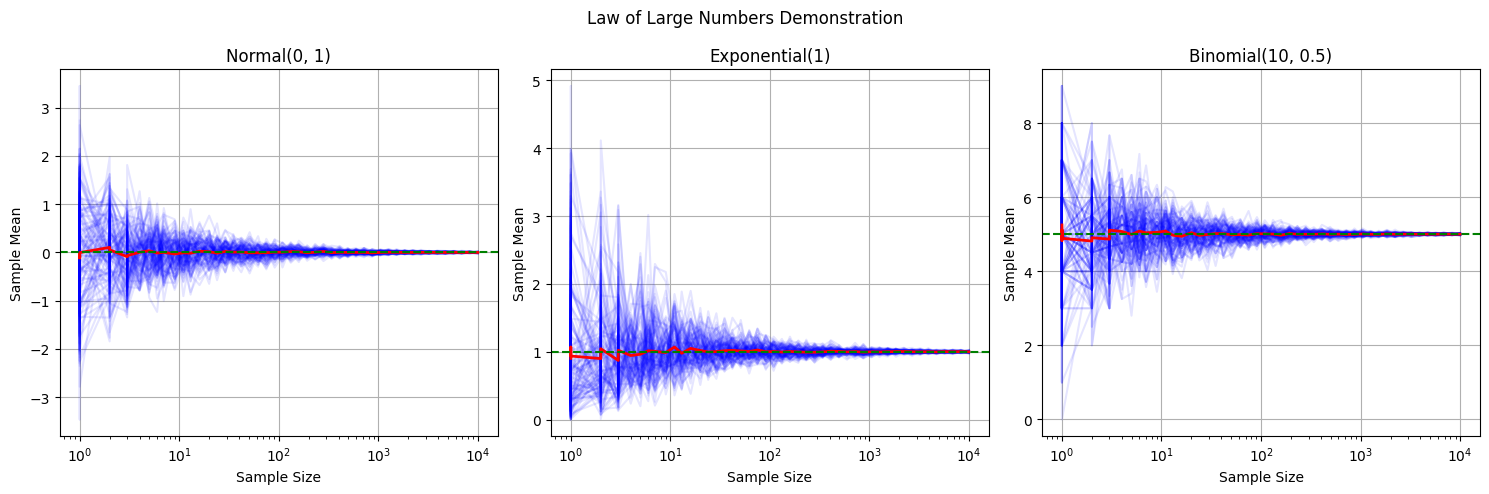

Summary Statistics:
 Distribution   True Mean  Final Est. Mean Std Error 
-------------------------------------------------------
 Normal(0, 1)     0.0000       5.0010        0.0166  
Exponential(1)    1.0000       5.0010        0.0166  
Binomial(10, 0.5)   5.0000       5.0010        0.0166  


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Function to demonstrate LLN
def demonstrate_lln(distribution, params, true_mean, num_samples, max_n, num_experiments):
    """
    Demonstrates the Law of Large Numbers for a given distribution.

    Args:
    distribution (function): NumPy random distribution function
    params (tuple): Parameters for the distribution
    true_mean (float): True mean of the distribution
    num_samples (int): Number of sample sizes to test
    max_n (int): Maximum sample size
    num_experiments (int): Number of experiments to run for each sample size

    Returns:
    sample_sizes (array): Array of sample sizes tested
    mean_estimates (array): Array of mean estimates for each sample size
    """
    # Generate logarithmically spaced sample sizes
    sample_sizes = np.logspace(0, np.log10(max_n), num_samples, dtype=int)

    # Initialize array to store mean estimates
    mean_estimates = np.zeros((num_experiments, len(sample_sizes)))

    # Run experiments
    for i in range(num_experiments):
        for j, n in enumerate(sample_sizes):
            # Generate samples and calculate mean
            samples = distribution(*params, size=n)
            mean_estimates[i, j] = np.mean(samples)

    return sample_sizes, mean_estimates

# Set up the distributions to test
distributions = [
    (np.random.normal, (0, 1), 0, "Normal(0, 1)"),
    (np.random.exponential, (1,), 1, "Exponential(1)"),
    (np.random.binomial, (10, 0.5), 5, "Binomial(10, 0.5)")
]

# Set up the plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Law of Large Numbers Demonstration")

# Run demonstration for each distribution
for i, (dist, params, true_mean, name) in enumerate(distributions):
    sample_sizes, mean_estimates = demonstrate_lln(dist, params, true_mean,
                                                   num_samples=50, max_n=10000,
                                                   num_experiments=100)

    # Plot results
    axs[i].semilogx(sample_sizes, mean_estimates.T, 'b-', alpha=0.1)
    axs[i].semilogx(sample_sizes, np.mean(mean_estimates, axis=0), 'r-', linewidth=2)
    axs[i].axhline(y=true_mean, color='g', linestyle='--')
    axs[i].set_xlabel('Sample Size')
    axs[i].set_ylabel('Sample Mean')
    axs[i].set_title(name)
    axs[i].grid(True)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary Statistics:")
print(f"{'Distribution':^15} {'True Mean':^10} {'Final Est. Mean':^15} {'Std Error':^10}")
print("-" * 55)
for (dist, params, true_mean, name) in distributions:
    final_mean = np.mean(mean_estimates[:, -1])
    std_error = np.std(mean_estimates[:, -1])
    print(f"{name:^15} {true_mean:^10.4f} {final_mean:^15.4f} {std_error:^10.4f}")